# Linear Algebra, Gradients, Optimization

"Unfortunately, no one can be told what the Matrix is. You have to see it for yourself." -- Morpheus

## Paradigm

- **Data Analytics = Problem + Data + Linear Algebra + Probability/Statistics + Calculus + Optimization**

- A spreadsheet is a matrix

- These matrices are huge

- ... and high-dimensional! Get used to living in hyperspace.

In [90]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Scalars

Data must be arranged in $n$-dimensional arrays known as tensors. There are different types of tensors.

Scalars are single numbers. In Python, we use the **numpy** package to handle scalars, vectors, and tensors. Let's create a scalar. We may also think of a scalar as a zero-dimensional array. The function **ndim** in Python gives you the dimension, as follows.

Note: We did not need to explicitly import the numpy package with all its functions because the command "%pylab inline" above included an import of numpy.

In [91]:
x = array(8)
print('x =',x)
print(type(x))
print('dimension =',x.ndim)

x = 8
<class 'numpy.ndarray'>
dimension = 0


## Vectors

Vectors are single-dimension arrays. They may contain a large number of elements.

In [92]:
x = array([4,2,6,8,5])
print(type(x))
print('dimension =',x.ndim)

<class 'numpy.ndarray'>
dimension = 1


With vectors, we can also get the shape of the array, and since it is has one dimension, it is also its length.

In [93]:
print('Shape of x =',x.shape)

Shape of x = (5,)


## Matrices

A matrix is a two-dimensional array. We create a random array below.

In [94]:
x = zeros((5,3))
for i in range(5):
    for j in range(3):
        x[i,j] = randn()
print(x)
print('Dimension =',x.ndim)
print('Shape = ',x.shape)

[[-2.15391417  1.4523357   1.50366816]
 [ 0.89225229  0.93440525 -0.20113842]
 [-1.49666441 -0.29531876 -0.59068785]
 [ 2.38725338 -0.91385586 -2.16114807]
 [-1.47150495  0.1446446   0.38835402]]
Dimension = 2
Shape =  (5, 3)


## Tensors

An array that is of dimension three or greater is denoted as a "tensor." Though, vectors and matrices are also special cases of tensors. We create a 3-D tensor below.

Images are examples of 3-D and 4-D tensors.

In [95]:
x = zeros((5,3,2))
for i in range(5):
    for j in range(3):
        for k in range(2):
            x[i,j,k] = i+j+k
print(x)
print('Dimension =',x.ndim)
print('Shape =',x.shape)

[[[0. 1.]
  [1. 2.]
  [2. 3.]]

 [[1. 2.]
  [2. 3.]
  [3. 4.]]

 [[2. 3.]
  [3. 4.]
  [4. 5.]]

 [[3. 4.]
  [4. 5.]
  [5. 6.]]

 [[4. 5.]
  [5. 6.]
  [6. 7.]]]
Dimension = 3
Shape = (5, 3, 2)


In [96]:
# Random Tensors
x = random.random((2,3,2,4))
print(x)
print('Dimension =',x.ndim)
print('Shape =',x.shape)

[[[[0.12153605 0.74294384 0.20279662 0.47153075]
   [0.3386277  0.07411825 0.4697059  0.58813281]]

  [[0.59455384 0.50804945 0.40713437 0.16119988]
   [0.53500356 0.44145622 0.04324653 0.17804051]]

  [[0.84686518 0.03437969 0.79321791 0.70559198]
   [0.93256648 0.42246877 0.03615071 0.20683855]]]


 [[[0.22889155 0.77671148 0.94859596 0.55090385]
   [0.13833559 0.65654718 0.80707493 0.07013739]]

  [[0.47354392 0.1448231  0.02527489 0.35187707]
   [0.47552178 0.37005166 0.4667606  0.99769762]]

  [[0.17727482 0.93834039 0.65564763 0.22282735]
   [0.08411873 0.61697406 0.8299694  0.64283842]]]]
Dimension = 4
Shape = (2, 3, 2, 4)


## Dot Product

The dot product of two vectors is the element-wise multiplication of the vectors and then a sum of the products. We write this as

$$
x · y
$$

In [97]:
#dot product
x = array([1,2,3])
y = array([4,1,7])
print(x.dot(y))  #Method approach
print(dot(x,y))  #Functional syntax

27
27


## Norm of a vector

For a vector $x = [x_1,x_2,...,x_n]^\top$, the norm is written as

$$
\|x\| = \sqrt{x_1^2 + x_2^2 + ... + x_n^2} = \sqrt{x · x}
$$

## Euclidian Distance

This is a line of sight distance between two points in any dimension system. Given two coordinate points in space, $x = [x_1,...,x_n]$ and $y = [y_1,...,y_n]$, the distance is

$$
\sqrt{ \sum_{i=1}^n (x_i - y_i)^2 } = \|(x-y)\|
$$

In [98]:
distance = sqrt(sum((x-y)**2))
print(distance)
linalg.norm(x-y)

5.0990195135927845


5.0990195135927845

## Cosine of the angle between vectors

This is written as follows for the angle $\theta$ between two vectors, $x$ and $y$:

$$
cos(\theta) = \frac{x \cdot y}{\|x\| \cdot \|y\|}
$$

Where is this used?

In [99]:
x = array([1,2,3])
y = array([4,1,7])
cos_ine = x.dot(y)/sqrt(x.dot(x) * y.dot(y))
print('Cos(theta) =',cos_ine)

from scipy import spatial
cos_ine = 1 - spatial.distance.cosine(x,y)
print('Check = ',cos_ine)

Cos(theta) = 0.8882347881956881
Check =  0.8882347881956881


## Matrix Products

We can also take the product of a matrix and a vector. The shapes have to be compatible, i.e., the inner dimensions must match as we see in the next example.

In [100]:
x = array([[1,2,3],[4,5,6]])
y = array([4,1,7])
print(x.shape, y.shape)
print(x.dot(y))

(2, 3) (3,)
[27 63]


Here is the product of a matrix and another matrix. The result has the dimension of the left dimension of the first matrix and the right dimension of the second.

In [101]:
#matrix multiply
x = array([[1,2,3],[4,5,6]])
y = array([[4,1,7,4],[1,2,3,4],[4,6,8,1]])
print(x.shape, y.shape)
z = x.dot(y)
print('z =',z)
print(z.shape)

(2, 3) (3, 4)
z = [[18 23 37 15]
 [45 50 91 42]]
(2, 4)


In [102]:
#tensor products with matrix
x = random.random((2,3,2,4))
y = random.random((4,2))
print(x.shape, y.shape)
z = x.dot(y)
print(z)
print(z.shape)

(2, 3, 2, 4) (4, 2)
[[[[0.6994967  0.74405476]
   [0.5844237  0.76798289]]

  [[1.77389967 2.73747935]
   [0.86771136 1.02962654]]

  [[1.18114877 1.60091203]
   [0.73367057 1.10660841]]]


 [[[0.36556165 0.40753779]
   [1.0021085  1.13130361]]

  [[1.09401295 1.58091744]
   [0.89310682 1.27612591]]

  [[1.63786175 2.1070006 ]
   [0.86345873 1.61675532]]]]
(2, 3, 2, 2)


In [103]:
x = random.random((2,3,4))
y = random.random((4,3))
print(x.shape, y.shape)
z = x.dot(y)
print(z)
print(z.shape)

(2, 3, 4) (4, 3)
[[[0.76014865 0.72706561 0.68757654]
  [0.88038697 0.92455184 0.72590759]
  [1.78013209 1.78177733 1.88744571]]

 [[0.38653693 0.46933909 0.32381636]
  [0.82539293 0.75911036 0.7834833 ]
  [1.60397868 1.71455519 1.31982886]]]
(2, 3, 3)


## Reshaping tensors

It is easy to do this in numpy.

In [104]:
z.reshape((2,9))

array([[0.76014865, 0.72706561, 0.68757654, 0.88038697, 0.92455184,
        0.72590759, 1.78013209, 1.78177733, 1.88744571],
       [0.38653693, 0.46933909, 0.32381636, 0.82539293, 0.75911036,
        0.7834833 , 1.60397868, 1.71455519, 1.31982886]])

## Transpose

When we transpose a matrix, we interchange its rows and columns.

In [105]:
x = random.random((5,3))
print('x =',x)
print('Transpose =',x.T)

x = [[0.46436524 0.96441861 0.98823229]
 [0.18675306 0.28571189 0.75373502]
 [0.39334189 0.57938471 0.11725641]
 [0.3969636  0.16766538 0.01143522]
 [0.76021628 0.88034348 0.34674075]]
Transpose = [[0.46436524 0.18675306 0.39334189 0.3969636  0.76021628]
 [0.96441861 0.28571189 0.57938471 0.16766538 0.88034348]
 [0.98823229 0.75373502 0.11725641 0.01143522 0.34674075]]


## Rank

The rank of a matrix is the minimum number of independent rows and columns it has. Within numpy is a linear algebra module **linalg** which we call below.

In [106]:
rank_x = linalg.matrix_rank(x)
print('Rank =',rank_x)

Rank = 3


In [107]:
x = array([[1,2,3],[2,4,6],[5,3,1]])
rank_x = linalg.matrix_rank(x)
print('Rank =',rank_x)

Rank = 2


## Inverse by hand

Let's take a 2x2 matrix $A$, and it's inverse is denoted as $A^{-1}$, such that $A · A^{-1} = I$, where $I$ is the identity matrix, i.e.,

$$
I =
\left[
\begin{array}{cc}
1 & 0 \\
0 & 1
\end{array}
\right]
$$

$$
A =
\left[
\begin{array}{cc}
a & b \\
c & d
\end{array}
\right]
$$

$$
A^{-1} =
\frac{1}{ad - bc} ·
\left[
\begin{array}{cc}
d & -b \\
-c & a
\end{array}
\right]
$$


In [108]:
A = array([[1,4],[3,2]])
print(A)
print(inv(A))

byhand = 1/(1*2-4*3)*array([[2,-4],[-3,1]])
print(byhand)

[[1 4]
 [3 2]]
[[-0.2  0.4]
 [ 0.3 -0.1]]
[[-0.2  0.4]
 [ 0.3 -0.1]]


## Inverse in higher dimension

The inverse of a matrix is its "reciprocal" in a sense. So if we multiply a matrix by its inverse, we get the matrix form of 1, i.e., the identity matrix.

In [109]:
x = random.random((3,3))
print('x =',x)
rank_x = linalg.matrix_rank(x)
print('Rank =',rank_x)
inv_x = inv(x)
print('Inverse =',inv_x)
print('x times inverse(x)')
print(x.dot(inv_x).round(2))

x = [[0.19761769 0.98850935 0.41384832]
 [0.65867302 0.98323058 0.95672963]
 [0.67193693 0.60865728 0.97882202]]
Rank = 3
Inverse = [[-11.10368803  20.90761841 -15.74105927]
 [  0.05438646   2.47284923  -2.4400308 ]
 [  7.58858627 -15.89024185  13.34475655]]
x times inverse(x)
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]


You cannot take the inverse of a matrix if it is not of full rank, try this with the previous example and check.

## Applications of the Inverse

We may solve systems of linear equations using the matrix inverse. In finance, this is used in bond markets to get the prices of unit bonds.

Example: bonds paying interest every half year.
- 0.5 year bond, price = 100, coupon = 5\%
- 1.0 year bond, price = 100, coupon = 6\%
- 1.5 year bond, price = 101, coupon = 7\%
- 2.0 year bond, price = 99.5, coupon = 7.5\%

What is the price of a 2 year bond that pays 25 every half year?

In [110]:
Cmat = array([[102.5,0,0,0],[3,103,0,0],[3.5,3.5,103.5,0],[3.75,3.75,3.75,103.75]])
print("Rank = ",linalg.matrix_rank(Cmat))
Pmat = array([100,100,101,99.5])
Qmat = inv(Cmat).dot(Pmat)
print(Qmat)
newC = ones(4)*25
print('Price new = ',newC.dot(Qmat))

Rank =  4
[0.97560976 0.94245797 0.91098322 0.85678129]
Price new =  92.14580581727638


## Basis

- ${\hat i}$ is the vector $[1,0]^\top$ in a 2-D system. Likewise, ${\hat j}$ is the vector $[0,1]^\top$.
- Any vector can be written in terms of these two vectors, i.e., a vector $[4,-3]^\top$ may be written as

$$
(4 {\hat i}) + (-3 {\hat j})
$$

Thus, the coordinate system can be reframed in terms of the two standard vectors, which we call "basis vectors." The set of basis vectors is simply called "the basis."

All vectors in the system are linear combinations of the basis vectors.

We could have chosen any other two vectors $v_1, v_2$ to form the basis, other than ${\hat i}, {\hat j}$. The same point in 2-D space would then be a combination of the new basis vectors with different scalar weights.

## Span

The "span" of two basis vectors $v_1,v_2$ is the set of all possible vectors $v$ that can be generated by linear combinations of these vectors, i.e.,

$$
v = a v_1 + b v_2
$$

The span depends on the range of values allowed for $a,b$. For unrestricted $a,b$, the span is all of 2-D space.

Q: what is the span when the angle between $v_1,v_2$ is zero?

We see that $v_1,v_2$ are linearly independent.

Therefore, the basis of a $n$-dimensional vector space is a set of $n$ linearly independent vectors than span the full $n$-D space.

## Linear Transformations

A linear transformation is a function that maps a vector into a new vector.

If you think of a vector as a point in $n$-D space, then applying the same function to all points in the point cloud will move them all around the space into a new configuration. Each original vector becomes a new one.

Note that the origin remains in place.

Suppose, in 2-D space, we had a vector $v = a {\hat i} + b {\hat j} = \left[\begin{array}{c} a \\ b \end{array} \right]$. If we apply a linear transformation to this space that moves ${\hat i} → i$ and ${\hat j} → j$, then it will actually just move $v \rightarrow ai + bj$.

Note that ${\hat i},{\hat j},i,j$ are all vectors in 2-D space, i.e., defined by a pair of coordinates. We can stack these into a matrix:

$$
M = \left[\begin{array}{cc} i_1 & j_1 \\ i_2 & j_2 \end{array} \right]
$$

So we see that
$$
v → a \left[\begin{array}{c} i_1 \\ i_2 \end{array} \right] + b \left[\begin{array}{c} j_1 \\ j_2 \end{array} \right] = \left[\begin{array}{c} v_1 \\ v_2 \end{array} \right]
$$

The new vector $v$ is nothing but $M v$.

## Rotation of Axes

Assume a 2-D vector space.

Let ${\hat i} = \left[\begin{array}{c} 1 \\ 0 \end{array} \right]$ and ${\hat j} = \left[\begin{array}{c} 0 \\ 1 \end{array} \right]$. This is the classic coordinate system.

Suppose we rotate the coordinate system 90 degrees to the left. Then ${\hat i}$ moves to $i = \left[\begin{array}{c} 0 \\ 1 \end{array} \right]$ and ${\hat j}$ moves to $j = \left[\begin{array}{c} -1 \\ 0 \end{array} \right]$.

Where does the vector (point) $\left[\begin{array}{c} 4 \\ -3 \end{array} \right]$ go?

$$
4 \left[\begin{array}{c} 0 \\ 1 \end{array} \right] -3 \left[\begin{array}{c} -1 \\ 0 \end{array} \right] =
\left[\begin{array}{cc} 0 & -1 \\ 1 & 0 \end{array} \right] · \left[\begin{array}{c} 4 \\ -3 \end{array} \right] = \left[\begin{array}{c} 3 \\ 4 \end{array} \right]
$$

## Shear

What if both basis vectors don't rotate equally? Then we get a "shear" or a slanted grid.  

Let ${\hat i} = \left[\begin{array}{c} 1 \\ 0 \end{array} \right]$ and ${\hat j} = \left[\begin{array}{c} 0 \\ 1 \end{array} \right]$. This is the classic coordinate system.

Suppose we only rotate ${\hat j}$  45 degrees to the right. Then ${\hat i}$ stays at $i = \left[\begin{array}{c} 1 \\ 0 \end{array} \right]$ and ${\hat j}$ moves to $j = \left[\begin{array}{c} 1 \\ 1 \end{array} \right]$.

Where does the vector (point) $\left[\begin{array}{c} 4 \\ -3 \end{array} \right]$ go?

$$
4 \left[\begin{array}{c} 1 \\ 0 \end{array} \right] -3 \left[\begin{array}{c} 1 \\ 1 \end{array} \right] =
\left[\begin{array}{cc} 1 & 1 \\ 0 & 1 \end{array} \right] · \left[\begin{array}{c} 4 \\ -3 \end{array} \right] = \left[\begin{array}{c} 1 \\ -3 \end{array} \right]
$$

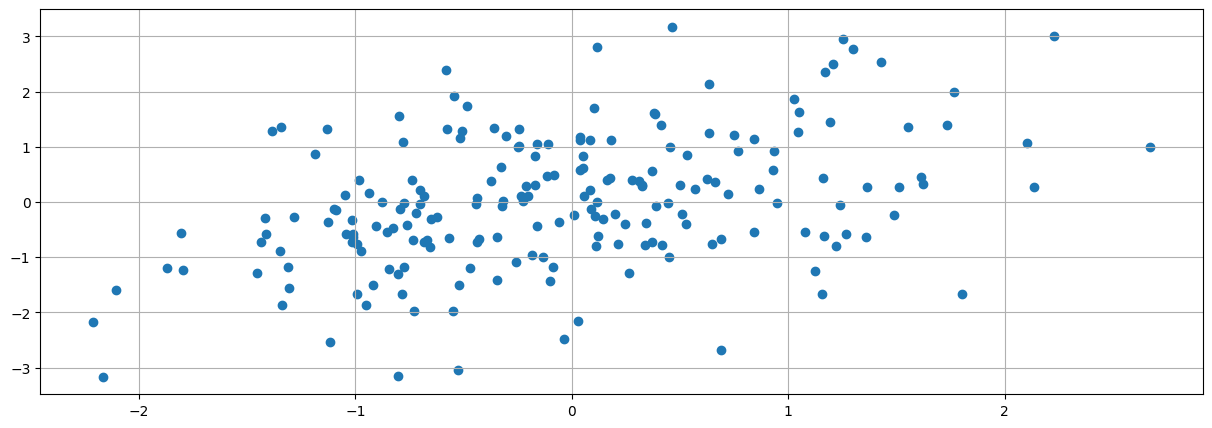

In [111]:
#generate many points in 2-D space
m = 200
x = randn(m)
y = rand(m)*x + randn(m)
scatter(x,y)
grid()

In [112]:
#Apply a linear transformation
A = array([[1,0],[1,1]])
print(A)
print(x[:5])
print(y[:5])
z = append(x,y).reshape((2,m)).T
print(z.shape)
print(z[:5])
znew = z.dot(A)
print(znew[:5])

[[1 0]
 [1 1]]
[ 0.11003882  0.68949196 -0.84250225  0.37819172  0.05057422]
[-0.79498512 -0.67368341 -1.20414781  1.62118543  0.61958009]
(200, 2)
[[ 0.11003882 -0.79498512]
 [ 0.68949196 -0.67368341]
 [-0.84250225 -1.20414781]
 [ 0.37819172  1.62118543]
 [ 0.05057422  0.61958009]]
[[-0.6849463  -0.79498512]
 [ 0.01580854 -0.67368341]
 [-2.04665006 -1.20414781]
 [ 1.99937715  1.62118543]
 [ 0.67015431  0.61958009]]


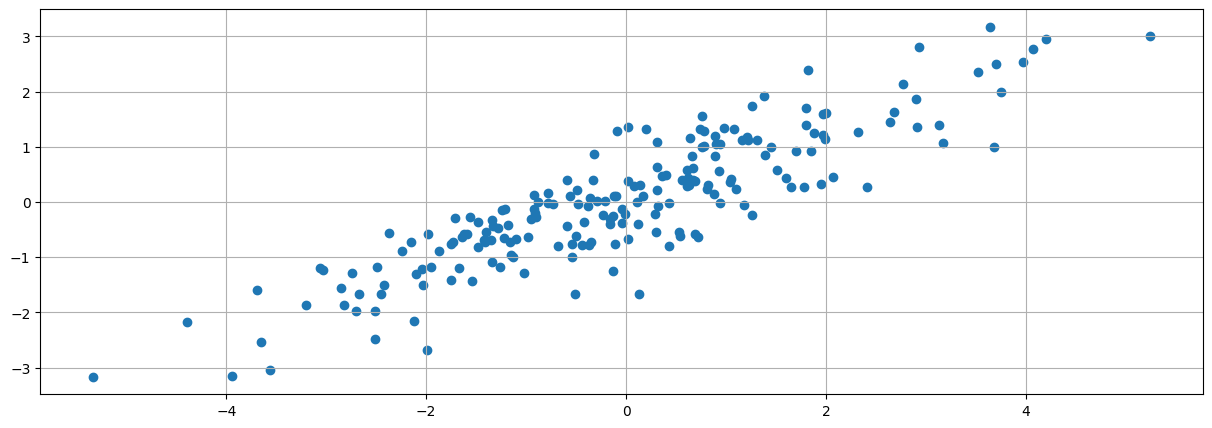

In [113]:
scatter(znew[:,0],znew[:,1])
grid()

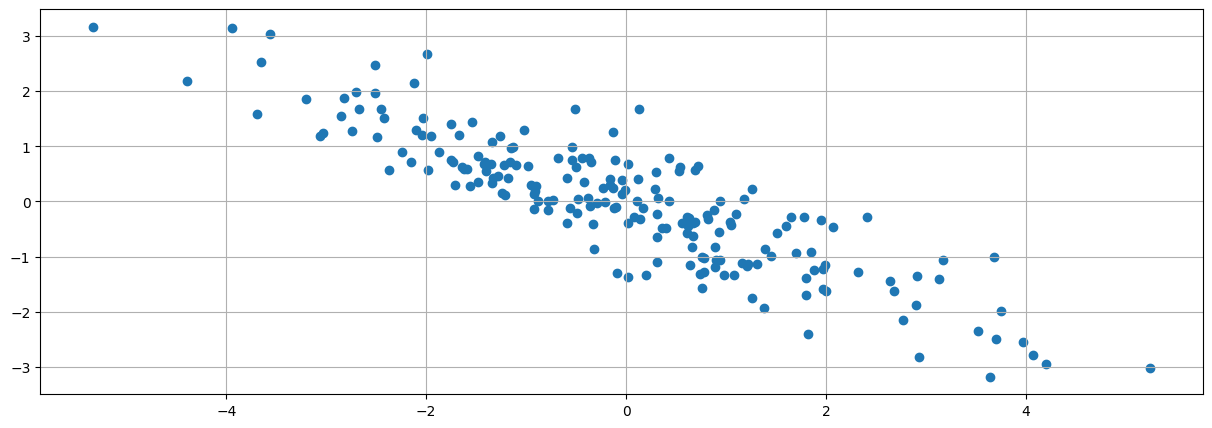

In [114]:
#Apply a linear transformation 2
A = array([[1,0],[1,-1]])
z = append(x,y).reshape((2,m)).T
znew = z.dot(A)
scatter(znew[:,0],znew[:,1])
grid()

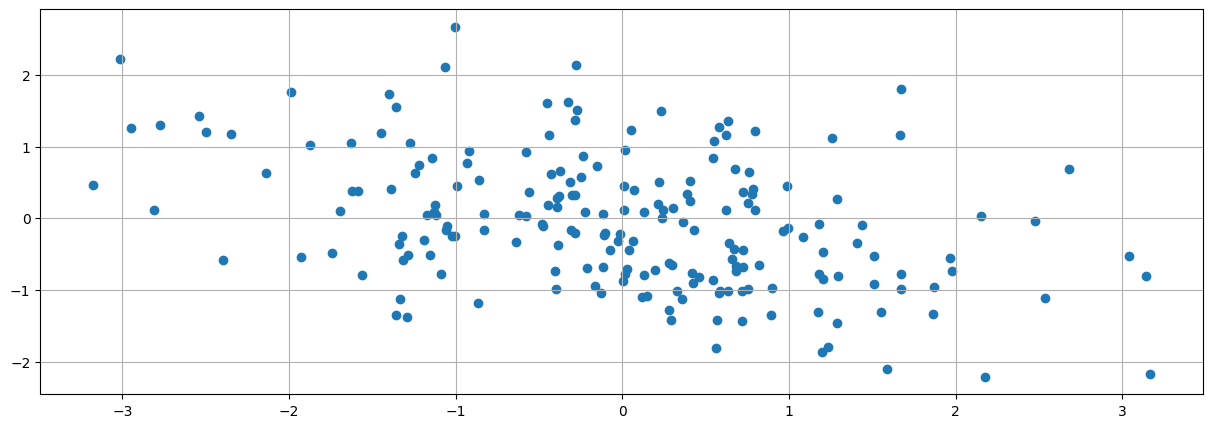

In [115]:
#Apply a rotation 90 degrees left
A = array([[0,1],[-1,0]])
z = append(x,y).reshape((2,m)).T
znew = z.dot(A)
scatter(znew[:,0],znew[:,1])
grid()

**Multiplying the vectors in a cartesian space by a matrix gives the transformed points in a new vector space with a new basis**

- Linear transformation are matrix functions that take vectors as inputs and produce vectors as outputs
- They give a new space in which grid lines remain parallel and evenly spaced.

How do you describe a linear transformation that is a rotation followed by a shear? This is called a **composition**.

Are compositions [commutative and associative](https://www.purplemath.com/modules/numbprop.htm)?

## Determinants

Linear transformations are done with a matrix (function). Some of these expand the space, others contract and distort it. (We also have rotations.) The determinant tells us by how much space is expanded or shrunk.  

in 2-D, if you look at the change in area of the unit square from the transformation, it gives you an idea of how the area is compressed or expanded across the entire vector space.

The determinant of a matrix is a way of reducing it to a single number that gives a sense of its size or "volume." The volume of a unit matrix will be 1.

$$
\left|
\begin{array}{cc}
a & b \\
c & d
\end{array}
\right| = ad - bc
$$

This is the signed area of a parallelogram flanked by two vectors from the origin: $(a,b)$ and $(c,d)$. This shows up in the inverse also:

$$
A^{-1} =
\left[
\begin{array}{cc}
a & b \\
c & d
\end{array}
\right]^{-1} = \frac{1}{ad - bc} ·
\left[
\begin{array}{cc}
d & -b \\
-c & a
\end{array}
\right] = \frac{1}{|A|} ·
\left[
\begin{array}{cc}
d & -b \\
-c & a
\end{array}
\right]
$$

Because multiplication by the inverse gives an identity matrix, we see that the formula for the inverse contains the division by the determinant as a normalization factor!

In [116]:
x = array([[1,0],[0,1]])
print('Determinant(x) =',det(x))

Determinant(x) = 1.0


In [117]:
x = array([[1,0,0],[0,1,0],[0,0,1]])
print('Determinant(x) =',det(x))

Determinant(x) = 1.0


In [118]:
#Switching two rows or columns changes sign
x = array([[1,0,0],[0,0,1],[0,1,0]])
print('Determinant(x) =',det(x))

Determinant(x) = -1.0


In [119]:
x = array([[1,0],[0,2]])
print('Determinant(x) =',det(x))

Determinant(x) = 2.0


In [120]:
x = array([[2,0],[0,2]])
print('Determinant(x) =',det(x))

Determinant(x) = 4.0


In [121]:
x = array([[1,0,0],[0,2,0],[0,0,3]])
print('Determinant(x) =',det(x))

Determinant(x) = 6.0


In [122]:
x = array([[1,4],[3,2]])
print(x)
print(det(x))

x = array([[3,2],[1,4]])
print(x)
det(x)

[[1 4]
 [3 2]]
-10.000000000000002
[[3 2]
 [1 4]]


10.000000000000002

In [123]:
#Volume of a parallelepiped
x = array([[1,1,1],[1,2,1],[1,1,3]])
print('Determinant(x) =',det(x))
x = x - 0.5; print(x)
print('Determinant(x) =',det(x))

Determinant(x) = 2.0
[[0.5 0.5 0.5]
 [0.5 1.5 0.5]
 [0.5 0.5 2.5]]
Determinant(x) = 1.0


In [124]:
#Rotation
x = array([[0,-1],[1,0]])
print(x)
print(det(x))

[[ 0 -1]
 [ 1  0]]
1.0


In [125]:
#Shear 1
x = array([[1,1],[0,1]])
print(x)
print(det(x))
#Shear 2
x = array([[1,0.5],[0,0.5]])
print(x)
print(det(x))

[[1 1]
 [0 1]]
1.0
[[1.  0.5]
 [0.  0.5]]
0.5


## Singular Matrix

- A matrix is singular if its determinant is zero.

- It follows that a singular matrix does not have an inverse.

In [126]:
x = array([[1,2],[2,4]])
print(det(x))
try:
    inv(x)
except:
    print('singular matrix')


0.0
singular matrix


## Determinants in Probability Functions

The determinant appears in probability functions like the multivariate normal distribution. The univariate normal probability density function (pdf) is

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2} \right]
$$


The probability density function for a vector of random variables $x=[x_1,x_2,...,x_n]^\top$ is:

$$
f(x_1,...,x_n; \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^n |\Sigma|}} \exp\left[-\frac{1}{2} (x-\mu)^\top \Sigma^{-1} (x-\mu) \right]
$$

Note how the determinant of the covariance matrix is needed for the multivariate model in place of the variance from the univariate model.

The bivariate normal pdf is

$$
f(x_1,x_2; \mu, \Sigma) = \frac{1}{2\pi \sigma_1 \sigma_2 \rho_{12}} \exp\left[-\frac{1}{2} (x-\mu)^\top \Sigma^{-1} (x-\mu) \right]
$$

Note also that the term $\sqrt{(x-\mu)^\top \Sigma^{-1} (x-\mu)}$ is known as the [Mahalonobis Distance](https://en.wikipedia.org/wiki/Mahalanobis_distance).

## Portfolio Calculations using Vectors and Matrices

- It is useful to examine the power of using vector algebra with an application.

- In order to compute the mean and variance of the portfolio return, we need to use the portfolio weights ${\bf w}$ and the covariance matrix of stock returns ${\bf R}$, denoted ${\bf \Sigma}$. The mean return of each stock in the portfolio is carried in a vector ${\bf \mu}$.

- What is covariance and correlation?

## Mean Return

The weighted return is a vector computed as follows:

$$
R_p = {\bf w}^⊤ · {\bf R}
$$

- This is a random vector.
- Each element of ${\bf R}$ comes from its own distribution.
- They are coupled into a joint distribution using mean returns ${\bf \mu}$, to get a mean portfolio return of

$$
E(R_p) = {\bf w}^⊤ · E({\bf R}) = {\bf w}^⊤ · {\bf \mu}
$$

## Covariance and Correlation

The covariance is the difference of two dot products for two vectors $x,y$:

$$
Cov(x,y) = E(x · y) - E(x) · E(y)
$$

Variance is

$$
Var(x) = Cov(x,x) = E(x · x) - E(x) · E(x)
$$

Correlation is

$$
Corr(x,y) = \frac{Cov(x,y)}{\sqrt{(Var(x) Var(y)}}
$$

In [127]:
x = randn(10000)
x = x.reshape(5,2000)
cov(x)
cov(x).shape

(5, 5)

## Covariance of stock returns

We note that the elements of the covariance matrix are $\Sigma_{ij}$. Note that $\sigma_{i}^2 = \Sigma_{ii}$.

We first write down the formula for a portfolio's return variance:

$$
Var(\boldsymbol{w'R}) = \boldsymbol{w'\Sigma w} = \sum_{i=1}^n \boldsymbol{w_i^2 \Sigma_{ii}^2}
+ \sum_{i=1}^n \sum_{j=1,i \neq j}^n \boldsymbol{w_i w_j \Sigma_{ij}}
$$
You are strongly encouraged to implement this by hand for $n=2$ to convince yourself that the vector form of the expression for variance $\boldsymbol{w'\Sigma w}$ is the same thing as the long form on the right-hand side of the equation above.

### Independent Returns

If returns are independent, then the formula collapses to:

$$
Var(\bf{w'R}) = \bf{w'\Sigma w} = \sum_{i=1}^n \boldsymbol{w_i^2 \Sigma_{ii}^2}
$$

### Dependent Returns

If returns are dependent, and equal amounts are invested in
each asset ($w_i=1/n,\;\;\forall i$):

$$
Var({\bf w'R}) =  \frac{1}{n}\sum_{i=1}^n \frac{\Sigma_{ii}^2}{n} + \frac{n-1}{n}\sum_{i=1}^n \sum_{j=1,i \neq j}^n  \frac{\Sigma_{ij}}{n(n-1)}
$$

$$
= \frac{1}{n} \bar{\Sigma_{ii}}^2 + \frac{n-1}{n} \bar{\Sigma_{ij}}
$$

$$
= \frac{1}{n} \bar{\Sigma_{ii}}^2 + \left(1 - \frac{1}{n} \right) \bar{\Sigma_{ij}}
$$

## Diversification in a stock portfolio

Here we use vector and summation math to understand how diversification in stock portfolios works. Diversification occurs when we increase the number of non-perfectly correlated stocks in a portfolio, thereby reducing portfolio variance.

**An Essential Insight**

The first term is the average variance, denoted $\bar{\sigma_1}^2$ divided by $n$, and the second is the average covariance, denoted $\bar{\sigma_{ij}}$ multiplied by factor $(n-1)/n$. As $n \rightarrow \infty$,

$$
Var({\bf w'R}) = \bar{\Sigma_{ij}}
$$

This produces the remarkable result that in a well diversified portfolio, the variances of each stock's return does not matter at all for portfolio risk! Further the risk of the portfolio, i.e., its variance, is nothing but the average of off-diagonal terms in the covariance matrix.

In [128]:
### Computing the portfolio standard deviation
### as n increases®

sd=0.20; cv=0.01; m=100
n = range(1,m+1)
sd_p = zeros(m)
for j in n:
    cv_mat = matrix(ones((j,j))*cv)
    fill_diagonal(cv_mat,sd**2)
    w = matrix(ones(j)*(1.0/j)).T
    sd_p[j-1] = sqrt((w.T).dot(cv_mat).dot(w))

<ipython-input-128-75403dbb67db>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sd_p[j-1] = sqrt((w.T).dot(cv_mat).dot(w))


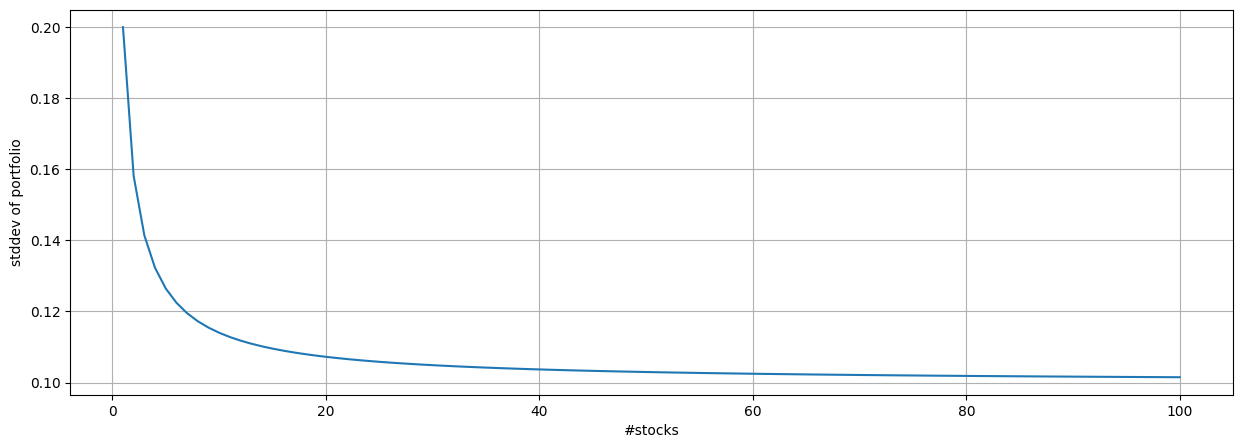

In [129]:
### Plot risk as n increases
rcParams['figure.figsize'] = 15,5

plot(n,sd_p)
xlabel('#stocks')
ylabel('stddev of portfolio')
grid()

The asymptote is the level of **systematic** risk, after all security-specific (**idiosyncractic**) risk has been diversified away.

## Do we still get diversification if the weights are not 1/n?

- Assume 100 stocks, indexed by $k$.
- Invest in all the stocks in proportion to the index $k$, i.e., invest 1 in the first, 2 in the second, ..., and 100 in the last stock.
- The total invested would be $\sum_{k=1}^{100} k = 5050$ so that the stock with the largest proportion would be the last one, with a share of $100/5050 = 0.0198$. So there is hardly much invested in any one stock, as we can see.
- Thus, once $k$ is large, we do get sufficient diversification.

In [130]:
print(100/sum(range(1,101)))

0.019801980198019802


## Multivariate Linear Functions

The simplest linear functions are dot products.

The function $f = 3 x_1 + 2 x_2 + 7 x_3$ may be written as $f = a^\top · x$ where $a=[3,2,7]$ and $x=[x_1,x_2,x_3]$.

The gradient of $f$ with respect to $x$ is $a$. It comprises 3 components:

$$
[\frac{\partial f}{∂ x_1}, \frac{\partial f}{∂ x_2}, \frac{\partial f}{∂ x_3}] = [3,2,7]
$$

## Quadratic Functions

What sort of function is

$$
f = x^⊤ · A \cdot x  
$$

Is it a scalar function or a vector?

Suppose $x = [x_1,x_2]^\top$ and $A = \left[\begin{array}{cc} 2 & 3 \\ 1 & 8  \end{array} \right]$.

Write out $f$ completely.

$$
f = 2 x_1^2 + 4 x_1 x_2 + 8 x_2^2
$$

Gradient is

$$
[\frac{\partial f}{∂ x_1}, \frac{\partial f}{∂ x_2}] = [4 x_1 + 4 x_2, 4 x_1 + 16 x_2]
$$

## Vector Calculus

Almost always, you can treat the matrices and vectors as scalars to differentiate these functions. But you have to be careful. When we had the function $f = a · x$, the derivative was $\frac{\partial f}{∂ x} = a$.

But when we had $f = x^⊤ · A · x$ the derivative is actually the following:

$$
\frac{\partial f}{∂ x} = A · x + A^⊤ · x = \left[\begin{array}{c} 4 x_1 + 4 x_2 \\ 4 x_1 + 16 x_2 \end{array}\right]
$$

Check this by hand!

## Minimize the function above

Use first-order conditions equal to zero.

In [131]:
a = array([[4,4],[4,16]])
print(a)
b = array([0,0])
linalg.solve(a,b)

[[ 4  4]
 [ 4 16]]


array([0., 0.])

In [132]:
from scipy.optimize import minimize

def f(x,A):
    return x.dot(A).dot(x)

In [133]:
x = array([1,1])
A = array([[2,3],[1,8]])
print(f(x,A))

sol = minimize(f,[1.0,1.0],A)
sol

14


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.413984996660949e-16
        x: [-1.210e-11 -7.425e-09]
      nit: 4
      jac: [ 5.412e-11  3.617e-10]
 hess_inv: [[ 3.333e-01 -8.333e-02]
            [-8.333e-02  8.333e-02]]
     nfev: 18
     njev: 6

## Gradient Descent

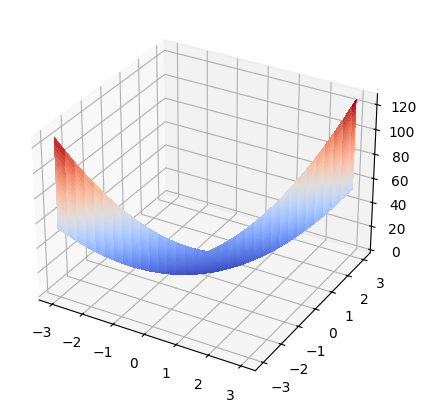

In [134]:
x1 = linspace(-3,3,101)
x2 = linspace(-3,3,101)
fn = zeros((101,101))
for i in range(101):
    for j in range(101):
        x = array([x1[i],x2[j]])
        fn[i,j] = f(x,A)

from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = fig.add_subplot(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x1, x2, fn, cmap=cm.coolwarm, linewidth=0, antialiased=False)


The gradient descent update is

$$
x_i = x_i - η · \frac{∂ f}{\partial x_i}
$$


In [135]:
eta = 0.1  #learning rate
x1 = 2; x2 = 2  #initial values
for t in range(30):
    g1 = 4*x1 + 4*x2
    g2 = 4*x1 + 16*x2
    x1 = x1 - eta*g1
    x2 = x2 - eta*g2
    x = array([x1,x2])
    print('t =',t,'x1 =',x1,'x2 =',x2,'fn =',f(x,A))

t = 0 x1 = 0.3999999999999999 x2 = -2.0 fn = 29.12
t = 1 x1 = 1.04 x2 = 1.04 fn = 15.142400000000002
t = 2 x1 = 0.20799999999999996 x2 = -1.04 fn = 7.874048
t = 3 x1 = 0.5408 x2 = 0.5408 fn = 4.094504959999999
t = 4 x1 = 0.10815999999999998 x2 = -0.5408 fn = 2.1291425791999994
t = 5 x1 = 0.28121599999999997 x2 = 0.28121600000000013 fn = 1.1071541411840007
t = 6 x1 = 0.05624319999999994 x2 = -0.281216 fn = 0.5757201534156802
t = 7 x1 = 0.14623231999999997 x2 = 0.14623232000000008 fn = 0.2993744797761538
t = 8 x1 = 0.029246463999999944 x2 = -0.14623232000000003 fn = 0.15567472948359995
t = 9 x1 = 0.07604080639999998 x2 = 0.07604080640000005 fn = 0.080950859331472
t = 10 x1 = 0.015208161279999959 x2 = -0.07604080640000005 fn = 0.04209444685236548
t = 11 x1 = 0.039541219328 x2 = 0.039541219328000046 fn = 0.021889112363230045
t = 12 x1 = 0.007908243865599983 x2 = -0.03954121932800003 fn = 0.011382338428879627
t = 13 x1 = 0.020561434050560004 x2 = 0.020561434050560025 fn = 0.0059188159830174

## Euler's Homogenous Function Theorem

If a function is linear homogeneous, then

$$
f(m x_1,...,m x_n) = m f(x_1,...,x_n)
$$

We say that the function is homogeneous of degree 1. If the function was homogeneous of degree 2, then

$$
f(m x_1,...,m x_n) = m^2 f(x_1,...,x_n)
$$

Is the function above $f(x,A)$ above homogeneous of degree 1 or 2?

Euler's formula says that if the function is linear homogeneous then, it may be written equivalently as follows:

$$
f(x_1,...,x_n) = \frac{∂ f}{∂ x_1} x_1 + \ldots + \frac{∂ f}{∂ x_n} x_n
$$

## Markowitz's Nobel Prize

We are interested in portfolios of $n$ assets, which have a mean return which we denote as $E(r_p)$, and a variance, denoted $Var(r_p)$.

Let $\underline{w} \in R^n$ be the portfolio weights. What this means is that we allocate each \$1 into various assets, such that the total of the weights sums up to 1. Note that we do not preclude short-selling, so that it is possible for weights to be negative as well.

The optimization problem is defined as follows. We wish to find the portfolio that delivers the minimum variance (risk) while achieving a pre-specified level of expected (mean) return.

$$
\min_{\underline{w}} \quad \frac{1}{2}\: \underline{w}' \underline{\Sigma} \: \underline{w}
$$

subject to

$$
\underline{w}'\:\underline{\mu} = E(r_p)
$$

$$
\underline{w}'\:\underline{1} = 1
$$

Note that we have a $\frac{1}{2}$ in front of the variance term above, which is for mathematical neatness as will become clear shortly. The minimized solution is not affected by scaling the objective function by a constant.

The first constraint forces the expected return of the portfolio to a specified mean return, denoted $E(r_p)$, and the second constraint requires that the portfolio weights add up to 1, also known as the "fully invested" constraint. It is convenient that the constraints are equality constraints.  

### Solution

This is a Lagrangian problem, and requires that we embed the constraints into the objective function using Lagrangian multipliers $\{\lambda_1, \lambda_2\}$. This results in the following minimization problem:

$$
\min_{\underline{w}\, ,\lambda_1, \lambda_2} \quad L=\frac{1}{2}\:\underline{w}'\underline{\Sigma} \:\underline{w}+
\lambda_1[E(r_p)-\underline{w}'\underline{\mu}]+\lambda_2[1-\underline{w}'\underline{1}\;]
$$

To minimize this function, we take derivatives with respect to $\underline{w}$, $\lambda_1$, and $\lambda_2$, to arrive at the first order conditions:

$$
\frac{\partial L}{\partial \underline{w}} = \underline{\Sigma}\:\underline{w} - \lambda_1 \underline{\mu} - \lambda_2 \underline{1}= \underline{0} \qquad(1) \\
$$

$$
\frac{\partial L}{\partial \lambda_1} = E(r_p)-\underline{w}'\underline{\mu}= 0 \\
$$

$$
\frac{\partial L}{\partial \lambda_2} = 1-\underline{w}'\underline{1}= 0
$$

The first equation above, is a system of $n$ equations, because the derivative is taken with respect to every element of the vector $\underline{w}$. Hence, we have a total of $(n+2)$ first-order conditions.
From (1)

$$
\underline{w} = \Sigma^{-1}(\lambda_1\underline{\mu}+\lambda_2\underline{1})
$$

$$
\underline{w} = \lambda_1\Sigma^{-1}\underline{\mu}+\lambda_2\Sigma^{-1}\underline{1}\quad(2)
$$

Premultiply (2) by $\underline{\mu}'$:

$$
\underline{\mu}'\underline{w}=\lambda_1\underbrace{\,\underline{\mu}'\underline{\Sigma}^{-1}\underline{\mu}\,}_B+\lambda_2\underbrace{\,\underline{\mu}'\underline{\Sigma}^{-1}\underline{1}\,}_A=E(r_p)
$$

Also premultiply (2) by $\underline{1}'$:

$$
\underline{1}'\underline{w}=\lambda_1\underbrace{\,\underline{1}'\underline{\Sigma}^{-1}\underline{\mu}}_A+
\lambda_2\underbrace{\,\underline{1}'\underline{\Sigma}^{-1}\underline{1}}_C=1
$$

Solve for $\lambda_1, \lambda_2$

$$
\lambda_1=\frac{CE(r_p)-A}{D}
$$

$$
\lambda_2=\frac{B-AE(r_p)}{D}
$$

$$
\mbox{where} \quad D=BC-A^2
$$

Note 1: Since $\underline{\Sigma}$ is positive definite,
$\underline{\Sigma}^{-1}$ is also positive definite: $B>0, C>0$.

Note 2: Given solutions for $\lambda_1, \lambda_2$, we solve for $\underline{w}$.

$$
\underline{w}=\underbrace{\;\frac{1}{D}\,[B\underline{\Sigma}^{-1}\underline{1}
-A\underline{\Sigma}^{-1}\underline{\mu}]}_{\underline{g}}+\underbrace{\;\frac{1}{D
}\,[C\underline{\Sigma}^{-1}\underline{\mu} -
A\underline{\Sigma}^{-1}\underline{1}\,]}_{\underline{h}}\cdot E(r_p)
$$

This is the expression for the optimal portfolio weights that minimize the variance for given expected return $E(r_p)$. We see that the vectors $\underline{g}$, $\underline{h}$ are fixed once we are given the inputs to the problem, i.e., $\underline{\mu}$ and $\underline{\Sigma}$.

Note 3: We can vary $E(r_p)$ to get a set of frontier (efficient or optimal) portfolios \underline{w}.

$$
\underline{w}=\underline{g}+\underline{h}\,E(r_p)
$$


If $\quad E(r_p)= 0,\; \underline{w} = \underline{g}$

If $\quad E(r_p)= 1,\; \underline{w} = \underline{g}+\underline{h}$

Note that

$$
\underline{w}=\underline{g}+\underline{h}\,E(r_p)=[1-E(r_p)]\,\underline{g}+E(r_p)[\,\underline{g}+\underline{h}\:]
$$

Hence these 2 portfolios $\underline{g}, \underline{g} +
\underline{h}$ "generate" the entire frontier.


In [136]:
def markowitz(mu,cv,Er):
    n = len(mu)
    wuns = ones(n)
    cvinv = linalg.inv(cv)
    A = wuns.T.dot(cvinv).dot(mu)
    B = mu.T.dot(cvinv).dot(mu)
    C = wuns.T.dot(cvinv).dot(wuns)
    D = B*C - A*A
    lam = (C*Er-A)/D
    gam = (B-A*Er)/D
    wts = lam*(cvinv.dot(mu)) + gam*(cvinv.dot(wuns))
    return wts

In [137]:
#PARAMETERS
mu = array([0.02,0.10,0.20])
n = len(mu)
cv = array([0.0001,0,0,0,0.04,0.02,0,0.02,0.16])
cv = cv.reshape(n,n)
print(cv.round(4))

[[1.0e-04 0.0e+00 0.0e+00]
 [0.0e+00 4.0e-02 2.0e-02]
 [0.0e+00 2.0e-02 1.6e-01]]


In [138]:
Er = 0.18

#SOLVE PORTFOLIO PROBLEM
wts = markowitz(mu,cv,Er)
wts

array([-0.35759312,  0.84366762,  0.5139255 ])

In [139]:
print("Weights = ",wts)
print("Sum of weights = ",sum(wts))
print("Expected return = ",wts.T.dot(mu))
print("Std Dev of return = ",sqrt(wts.T.dot(cv).dot(wts)))

Weights =  [-0.35759312  0.84366762  0.5139255 ]
Sum of weights =  1.0000000000000087
Expected return =  0.1799999999999997
Std Dev of return =  0.29679317564888064


In [140]:
#NUMERICAL OPTIMIZATION
from scipy.optimize import minimize

def port_var(w,cv,mu,Er):
    return w.T.dot(cv).dot(w)

w0 = array([0.3,0.3,0.4])
cons = ({'type': 'eq', 'fun': lambda x:  sum(x)-1.0}, {'type': 'eq', 'fun': lambda x: x.T.dot(mu)-Er})
sol = minimize(port_var,w0,args=(cv,mu,Er),method="SLSQP",constraints=cons)
print(sol.x)
sol

[-0.35759308  0.84366754  0.51392554]


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.08808618934029633
       x: [-3.576e-01  8.437e-01  5.139e-01]
     nit: 5
     jac: [-7.152e-05  8.805e-02  1.982e-01]
    nfev: 20
    njev: 5

In [141]:
#NUMERICAL OPTIMIZATION WITH NO SHORT SELLING
w0 = array([0.3,0.3,0.4])
cons = ({'type': 'eq', 'fun': lambda x:  sum(x)-1}, {'type': 'eq', 'fun': lambda x: x.T.dot(mu)-Er},
        {'type': 'ineq', 'fun': lambda x:  min(x)-0})
sol = minimize(port_var,w0,args=(cv,mu,Er),method="SLSQP",constraints=cons)
sol

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.11040000019791732
       x: [-4.857e-17  2.000e-01  8.000e-01]
     nit: 3
     jac: [ 0.000e+00  4.800e-02  2.640e-01]
    nfev: 12
    njev: 3